# Libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
path ='C:/Users/milon/Desktop/nlp6/' 
stopwords_list = path+'bangla_stopwords.txt'


# Dataset Preparation

In [79]:
# Read the data and take only 1000 Reviews
data = pd.read_csv(path+'comment_15000.csv')
print("Total Reviews:",len(data),
      "\nTotal happy Reviews:",len(data[data.Tag =='happy']),
      "\nTotal love Reviews:",len(data[data.Tag=='love']),
      "\nTotal Reviews:",len(data[data.Tag=='fear']),
      "\nTotal anger Reviews:",len(data[data.Tag=='anger']),
      "\nTotal sadness Reviews:",len(data[data.Tag=='sadness']))

Total Reviews: 15428 
Total happy Reviews: 5362 
Total love Reviews: 1304 
Total Reviews: 1937 
Total anger Reviews: 2159 
Total sadness Reviews: 4666


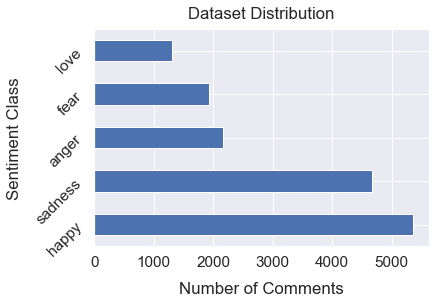

In [80]:
sns.set(font_scale=1.4)
data['Tag'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [81]:
# print some unprocessed reviews
sample_data = [10,100,150,2000,2500,4000,4500,5000,6000,6500,6660,6899,6400,7000,7500,8000]
for i in sample_data:
      print(data.Comment[i],'\n','Sentiment:-- ',data.Tag[i],'\n')  

আমি অনুভব করি যে দৌড়ানো একটি ঐশ্বরিক অভিজ্ঞতা এবং আমি কিছু ধরণের আধ্যাত্মিক মুখোমুখি হওয়ার আশা করতে পারি 
 Sentiment:--  happy 

আমি বলতে চাচ্ছি যে উশুতে এত উচ্চ প্রযুক্তিগত দক্ষতা অর্জনের জন্য সত্যিই কঠোর পরিশ্রম কিছুটা লজ্জা বোধ করছি কিন্তু একরকম অনুপ্রাণিত হয়েছি যখন আমি দেখলাম বাচ্চারা তাদের ক্লান্তি থাকা সত্ত্বেও আন্তরিকভাবে উশু পারফরম্যান্স করছে 
 Sentiment:--  sadness 

আমি অনুভব করি যে আমি পথপ্রপাত এবং পাহাড়ে হাঁটা এবং দৌড়ানোর দুর্দান্ত জগতের দরজায় পা রেখেছি 
 Sentiment:--  happy 

আমি সত্যিই এটির প্রশংসা করেছি এমনকি ভেবেছিলাম যে আমি খ্রিস্টান নই যে কোনো ধরনের প্রার্থনাকে স্বাগত জানানো হয় এবং আইডি খুব হারিয়ে যাওয়া এবং এর বাইরে অনুভব করছি 
 Sentiment:--  sadness 

আমি নিজেকে বয়স্ক হয়ে ওঠার বিষয়ে বিরক্ত এবং আসন্ন দায়িত্ব সম্পর্কে চাপ অনুভব করি যার ফলে আমি সাধারণত কিছুটা দমন করা রাগ নিয়েই সন্তুষ্ট থাকি যা এটিকে প্ররোচিত করা হলেই এটি উপস্থিত হয় 
 Sentiment:--  fear 

আমি মনে করি তিনি এই ধারণার প্রতি এতটা আগ্রহী নন 
 Sentiment:--  happy 

আমি বোকার ছায়া অনুভব করছি 
 S

# Data Cleaning

In [82]:
# Data cleaning function
def process_comments(comment): 
    comment = re.sub('[^\u0980-\u09FF]',' ',str(comment)) #removing unnecessary punctuation
    return comment

In [83]:
# Apply the function into the dataframe
data['cleaned'] = data['Comment'].apply(process_comments)  

# print some cleaned reviews from the dataset
sample_data = [10,100,150,2000,2500,4000,4500,5000,6000,6500,6660,6899,6400,7000,7500,8000]
for i in sample_data:
     print('Original:\n',data.Comment[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.Tag[i],'\n')

Original:
 আমি অনুভব করি যে দৌড়ানো একটি ঐশ্বরিক অভিজ্ঞতা এবং আমি কিছু ধরণের আধ্যাত্মিক মুখোমুখি হওয়ার আশা করতে পারি 
Cleaned:
 আমি অনুভব করি যে দৌড়ানো একটি ঐশ্বরিক অভিজ্ঞতা এবং আমি কিছু ধরণের আধ্যাত্মিক মুখোমুখি হওয়ার আশা করতে পারি 
 Sentiment:--  happy 

Original:
 আমি বলতে চাচ্ছি যে উশুতে এত উচ্চ প্রযুক্তিগত দক্ষতা অর্জনের জন্য সত্যিই কঠোর পরিশ্রম কিছুটা লজ্জা বোধ করছি কিন্তু একরকম অনুপ্রাণিত হয়েছি যখন আমি দেখলাম বাচ্চারা তাদের ক্লান্তি থাকা সত্ত্বেও আন্তরিকভাবে উশু পারফরম্যান্স করছে 
Cleaned:
 আমি বলতে চাচ্ছি যে উশুতে এত উচ্চ প্রযুক্তিগত দক্ষতা অর্জনের জন্য সত্যিই কঠোর পরিশ্রম কিছুটা লজ্জা বোধ করছি কিন্তু একরকম অনুপ্রাণিত হয়েছি যখন আমি দেখলাম বাচ্চারা তাদের ক্লান্তি থাকা সত্ত্বেও আন্তরিকভাবে উশু পারফরম্যান্স করছে 
 Sentiment:--  sadness 

Original:
 আমি অনুভব করি যে আমি পথপ্রপাত এবং পাহাড়ে হাঁটা এবং দৌড়ানোর দুর্দান্ত জগতের দরজায় পা রেখেছি 
Cleaned:
 আমি অনুভব করি যে আমি পথপ্রপাত এবং পাহাড়ে হাঁটা এবং দৌড়ানোর দুর্দান্ত জগতের দরজায় পা রেখেছি 
 Sentiment:--  happy 

Original

# Preprocessing

In [84]:
# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = data.loc[data.length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),"\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 15 Small Reviews 
Total Reviews: 15413


# Dataset Summary

In [85]:
def data_summary(dataset):
    

    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Tag.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Tag==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Tag==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Tag==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)    



Class Name :  happy
Number of Documents:5359
Number of Words:96874
Number of Unique Words:9532
Most Frequent Words:

আমি	8452
এবং	3168
করি	2981
বোধ	2622
আমার	2169
যে	2062
অনুভব	1481
করছি	1403
মনে	1352
না	1143

Class Name :  sadness
Number of Documents:4662
Number of Words:79836
Number of Unique Words:7503
Most Frequent Words:

আমি	7478
বোধ	2738
এবং	2608
করি	2367
আমার	2016
যে	1460
করছি	1238
না	1183
অনুভব	1109
মনে	953

Class Name :  anger
Number of Documents:2154
Number of Words:38831
Number of Unique Words:5075
Most Frequent Words:

আমি	3493
এবং	1212
বোধ	1201
করি	1139
আমার	960
যে	747
না	596
অনুভব	535
করছি	528
মনে	479

Class Name :  fear
Number of Documents:1934
Number of Words:34049
Number of Unique Words:4716
Most Frequent Words:

আমি	3112
বোধ	1258
এবং	1061
করি	931
আমার	798
করছি	578
যে	557
না	460
করতে	439
অনুভব	393

Class Name :  love
Number of Documents:1304
Number of Words:24854
Number of Unique Words:4048
Most Frequent Words:

আমি	2069
এবং	869
করি	774
আমার	642
অনুভব	542
যে	519
বোধ	

# Dataset Summary Visualization

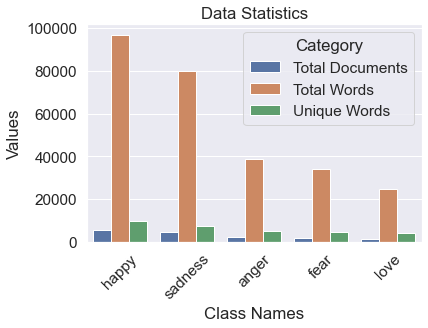

In [86]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

# Comment Lenght Distribution

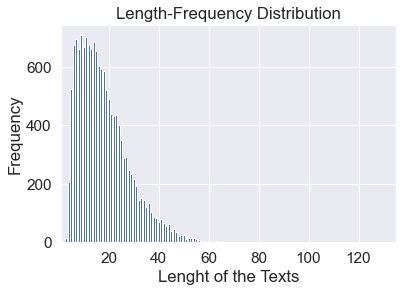

Maximum Length of a review: 68
Minimum Length of a review: 3
Average Length of a reviews: 18.0


In [87]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

# Take only happy=>love and anger=>sadness Class for Model Building

In [88]:
dataset.Tag = dataset.Tag.replace({'happy':'love','anger':'sadness'})
positive = dataset[dataset.Tag == 'love']
negative = dataset[dataset.Tag == 'sadness'][:4000]
dataset = positive.append(negative,ignore_index=True)
dataset.Tag.value_counts()

love       6663
sadness    4000
Name: Tag, dtype: int64

## Label Encoding and Dataset Splitting

In [89]:


def label_encoding(sentiment,bool):

    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels




def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector . 
    
    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array) 
        
    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test


In [90]:
dataset.cleaned = dataset.cleaned.apply(lambda x:x.replace('\n',' '))

# **Model Building Using Machine Learning**

## Feature Extraction Using TF-IDF- vectorizer

In [91]:

            
def calc_gram_tfidf(reviews,gram):
 
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve


In [93]:
                                              
def ml_models_defination(): 

    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    #model_names = ['Logistic Regression']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names 


                                         

def model_performace(model,X_train,X_test,y_train,y_test):

    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y),4)*100 
    
    return my_dict  

                                       
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df    

## Model Training

In [94]:
## save the performance of the model for each gram feature 
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    labels = label_encoding(dataset.Tag,False)
    
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = ml_models_defination()
    
    
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    
    
    #Save the performance parameter into json file
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy, f)

Feature Size :======> 13670

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 10663 
	Training		 9596 
	Test			 1067
Feature Size :======> 93065

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 10663 
	Training		 9596 
	Test			 1067
Feature Size :======> 224184

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 10663 
	Training		 9596 
	Test			 1067


## Performance Table

In [95]:
# Load all the json files
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")
  


========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     84.54      89.78   68.72     77.85          LR
1     77.23      72.89   67.54     70.11          DT
2     82.76      92.20   61.61     73.86          RF
3     85.29      87.54   73.22     79.74         MNB
4     75.91      69.88   68.72     69.30         KNN
5     80.04      91.97   54.27     68.26  Linear SVM
6     83.60      90.23   65.64     75.99     RBF SVM

========In case of Unigram feature:========

Highest Accuracy achieved by MNB at = 85.28999999999999
Highest F1-Score achieved by MNB at = 79.74
Highest Precision Score achieved by RF at = 92.2
Highest Recall Score achieved by MNB at = 73.22

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     80.69      92.19   55.92     69.62          LR
1     76.19      71.65   65.88     68.64          DT
2     79.66      92.89   52.61     67.17          RF
3   

**Conclusion:**

---



***From this performance table it can be said that the Trigarm feature combination with Multinomial Naive Bayes classifier provides highest accuray and F1-score value.***

## Performance Visualization

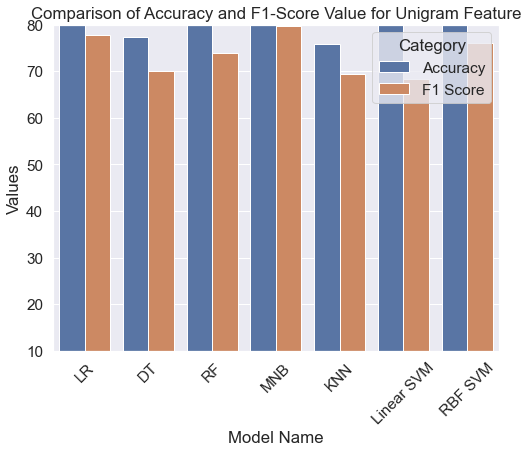

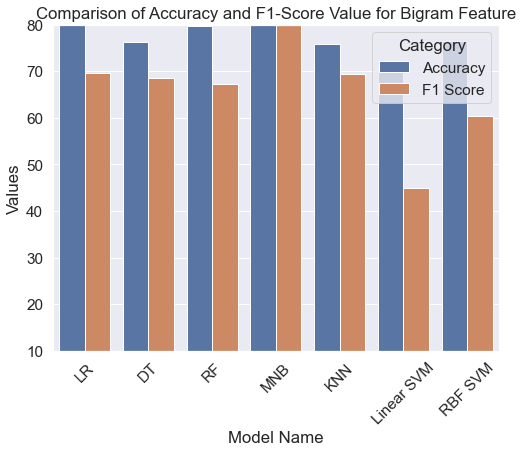

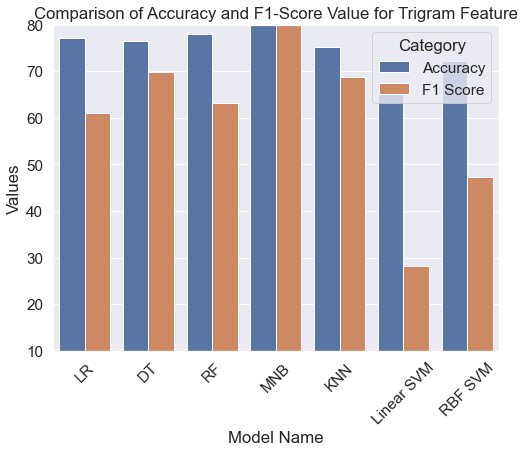

In [96]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name') 
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,80])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);